## EDA of Diabetes Patient

### Introduction About the data:

* `Id`: Unique identifier for each data entry.
* `Pregnancies`: Number of times pregnant.
* `Glucose`: Plasma glucose concentration over 2 hours in an oral glucose tolerance test.
* `BloodPressure`: Diastolic blood pressure (mm Hg).
* `SkinThickness`: Triceps skinfold thickness (mm).
* `Insulin`: 2-Hour serum insulin (mu U/ml).
* `BMI`: Body mass index (weight in kg / height in m^2).
* `DiabetesPedigreeFunction`: Diabetes pedigree function, a genetic score of diabetes.
* `Age`: Age in years.
* `Outcome`: Binary classification indicating the presence (1) or absence (0) of diabetes

`dataset link` : https://www.kaggle.com/datasets/nanditapore/healthcare-diabetes?select=Healthcare-Diabetes.csv



In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
data = pd.read_csv('data/Healthcare-Diabetes.csv')

In [4]:
data.shape

(2768, 10)

In [5]:
data.head()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1


### Data Checking
* check data type
* check missing value 
* check duplicate data
* check unique value for each column
* check statistic value 
* check category variation pada kolom kategori

In [6]:
## check for data type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2768 entries, 0 to 2767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        2768 non-null   int64  
 1   Pregnancies               2768 non-null   int64  
 2   Glucose                   2768 non-null   int64  
 3   BloodPressure             2768 non-null   int64  
 4   SkinThickness             2768 non-null   int64  
 5   Insulin                   2768 non-null   int64  
 6   BMI                       2768 non-null   float64
 7   DiabetesPedigreeFunction  2768 non-null   float64
 8   Age                       2768 non-null   int64  
 9   Outcome                   2768 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 216.4 KB


In [7]:
# define numerical and categorical features
numerical_features = [feature for feature in data.columns if data[feature].dtype != 'O']
categorical_features = [feature for feature in data.columns if data[feature].dtype == 'O']

# print column
print('We have {} numerical features : {}'.format(len(numerical_features), numerical_features))
print('We have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 10 numerical features : ['Id', 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
We have 0 categorical features : []


In [8]:
## check missing value
data.isna().sum()

Id                          0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
## check duplicate data
data.duplicated().sum()

0

In [10]:
## check unique value
data.nunique()

Id                          2768
Pregnancies                   17
Glucose                      136
BloodPressure                 47
SkinThickness                 53
Insulin                      187
BMI                          253
DiabetesPedigreeFunction     523
Age                           52
Outcome                        2
dtype: int64

In [11]:
# statistic value
data.describe()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000
mean,1384.500000,3.742775,121.102601,69.134393,20.824422,80.127890,32.137392,0.471193,33.132225,0.343931
std,799.197097,3.323801,32.036508,19.231438,16.059596,112.301933,8.076127,0.325669,11.777230,0.475104
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,692.750000,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.244000,24.000000,0.000000
50%,1384.500000,3.000000,117.000000,72.000000,23.000000,37.000000,32.200000,0.375000,29.000000,0.000000
75%,2076.250000,6.000000,141.000000,80.000000,32.000000,130.000000,36.625000,0.624000,40.000000,1.000000
max,2768.000000,17.000000,199.000000,122.000000,110.000000,846.000000,80.600000,2.420000,81.000000,1.000000


In [12]:
# there is no categorical data in dataset, so checking categorical variation skipp

### EDA on numerical feature 


#### numerical feature consist of:
* Discrete Variable
* Continous Variable 

In [13]:
## Discrete Feature
discrete_feature=[feature for feature in numerical_features if len(data[feature].unique())<25 and feature not in ['Id', 'Outcome']]
print("Discrete Variables : {}".format(discrete_feature))

Discrete Variables : ['Pregnancies']


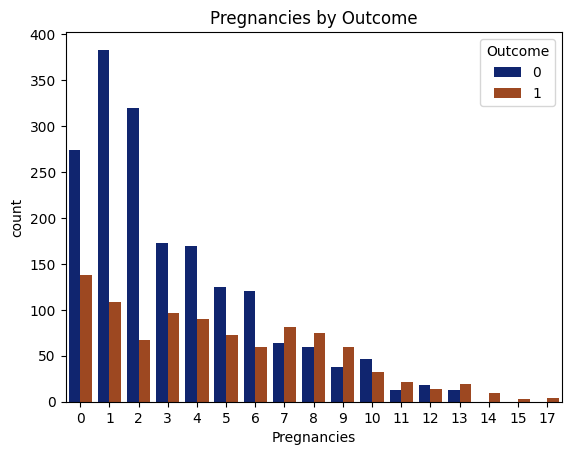

In [14]:
for feature in discrete_feature:
    sns.countplot(x=feature, data=data, hue = 'Outcome', palette='dark')
    plt.title('{} by Outcome'.format(feature))
    plt.show()

In [15]:
## Continous Feature
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature+['Id','Outcome']]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 7


In [16]:
# see continous feature data
data[continuous_feature].head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,148,72,35,0,33.6,0.627,50
1,85,66,29,0,26.6,0.351,31
2,183,64,0,0,23.3,0.672,32
3,89,66,23,94,28.1,0.167,21
4,137,40,35,168,43.1,2.288,33


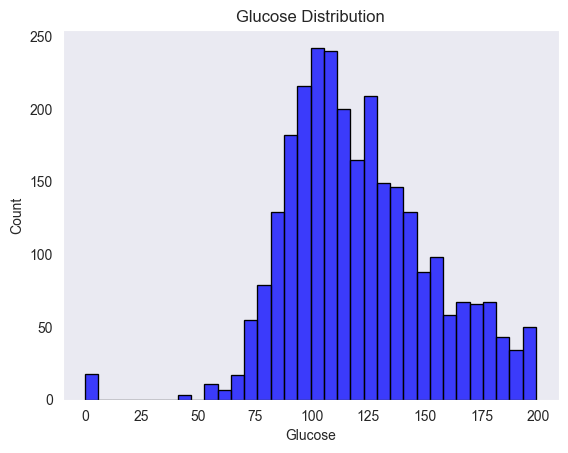

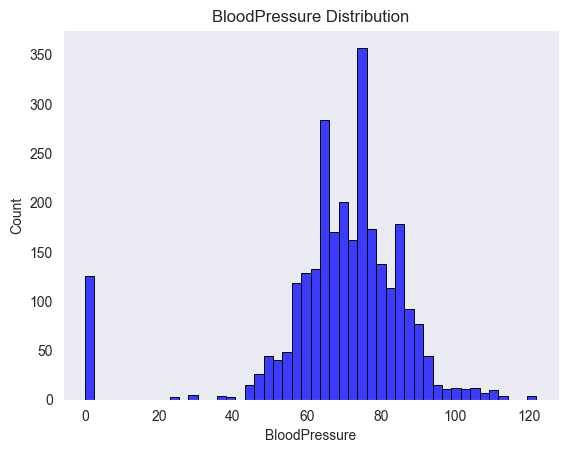

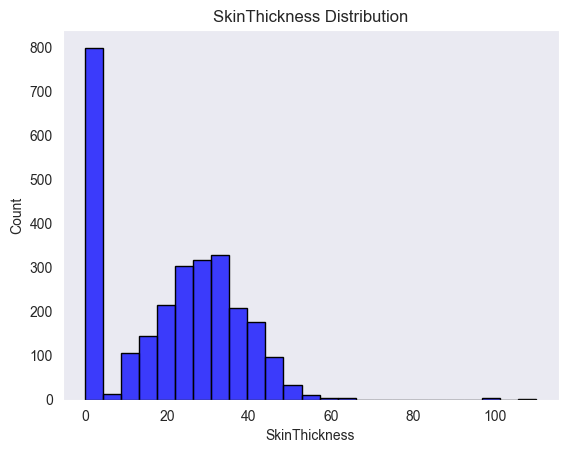

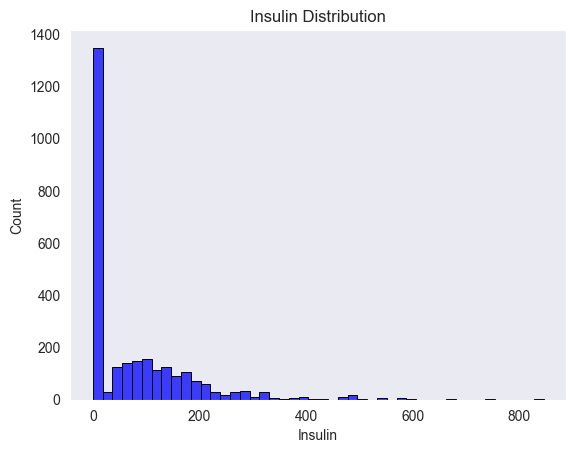

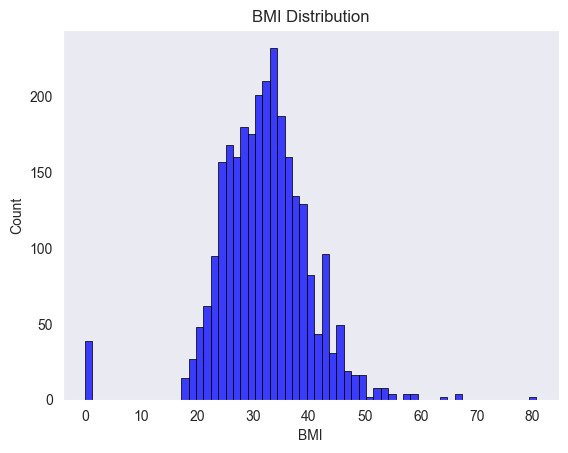

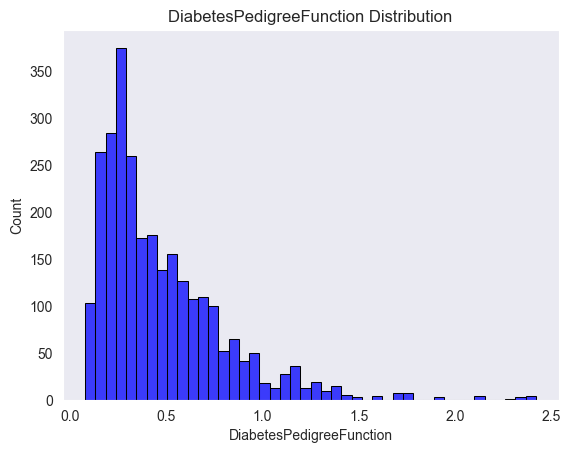

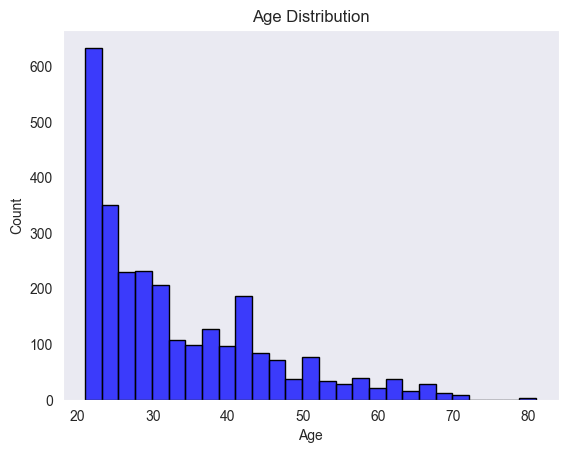

In [17]:
for feature in continuous_feature:
    sns.set_style('dark')
    sns.histplot(data=data, x=feature, color='b', edgecolor='black')
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title('{} Distribution'.format(feature))
    plt.show()

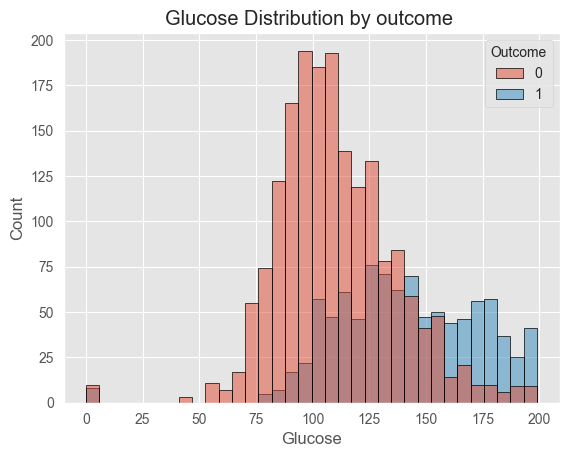

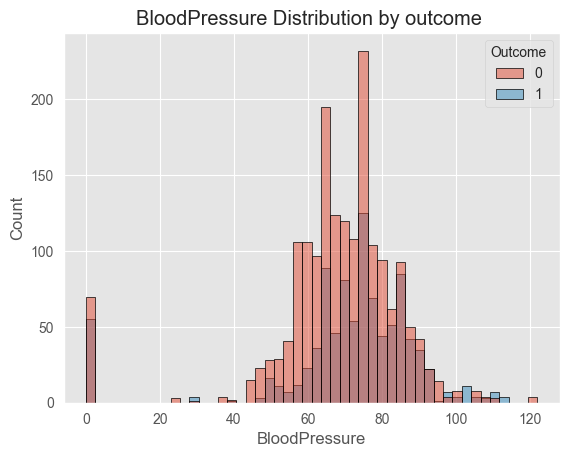

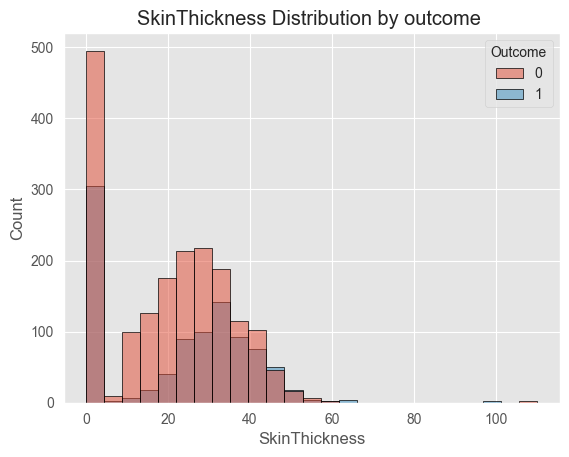

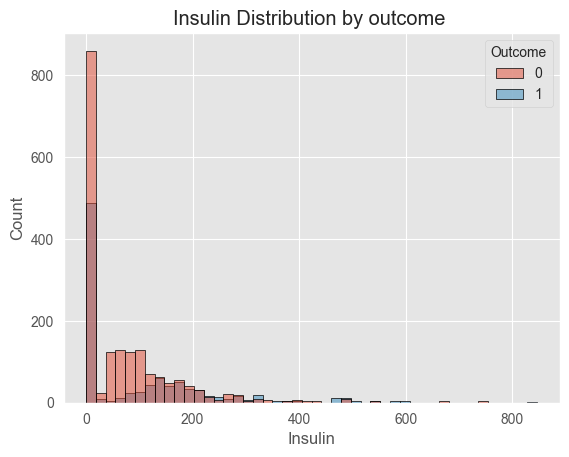

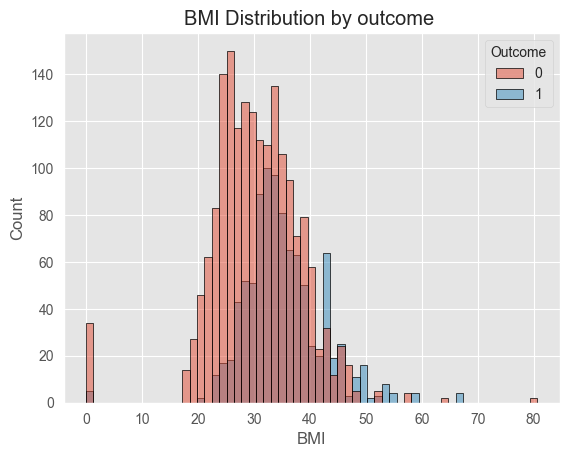

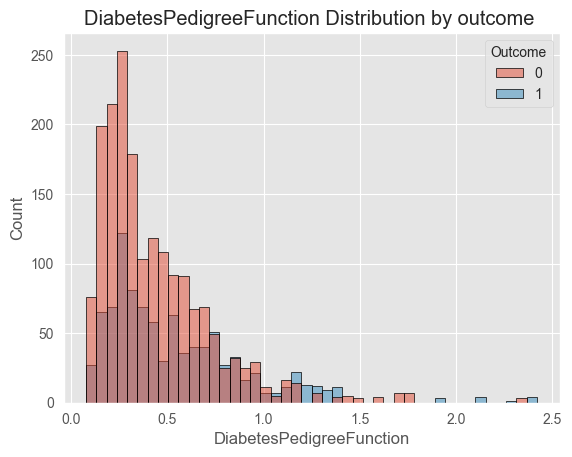

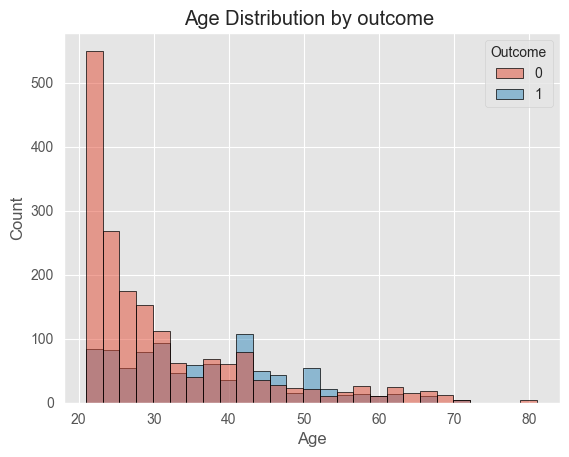

In [18]:
for feature in continuous_feature:
    plt.style.use('ggplot')
    sns.histplot(data=data, x=feature, color='b', edgecolor='black', hue='Outcome')
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title('{} Distribution by outcome '.format(feature))
    plt.show()

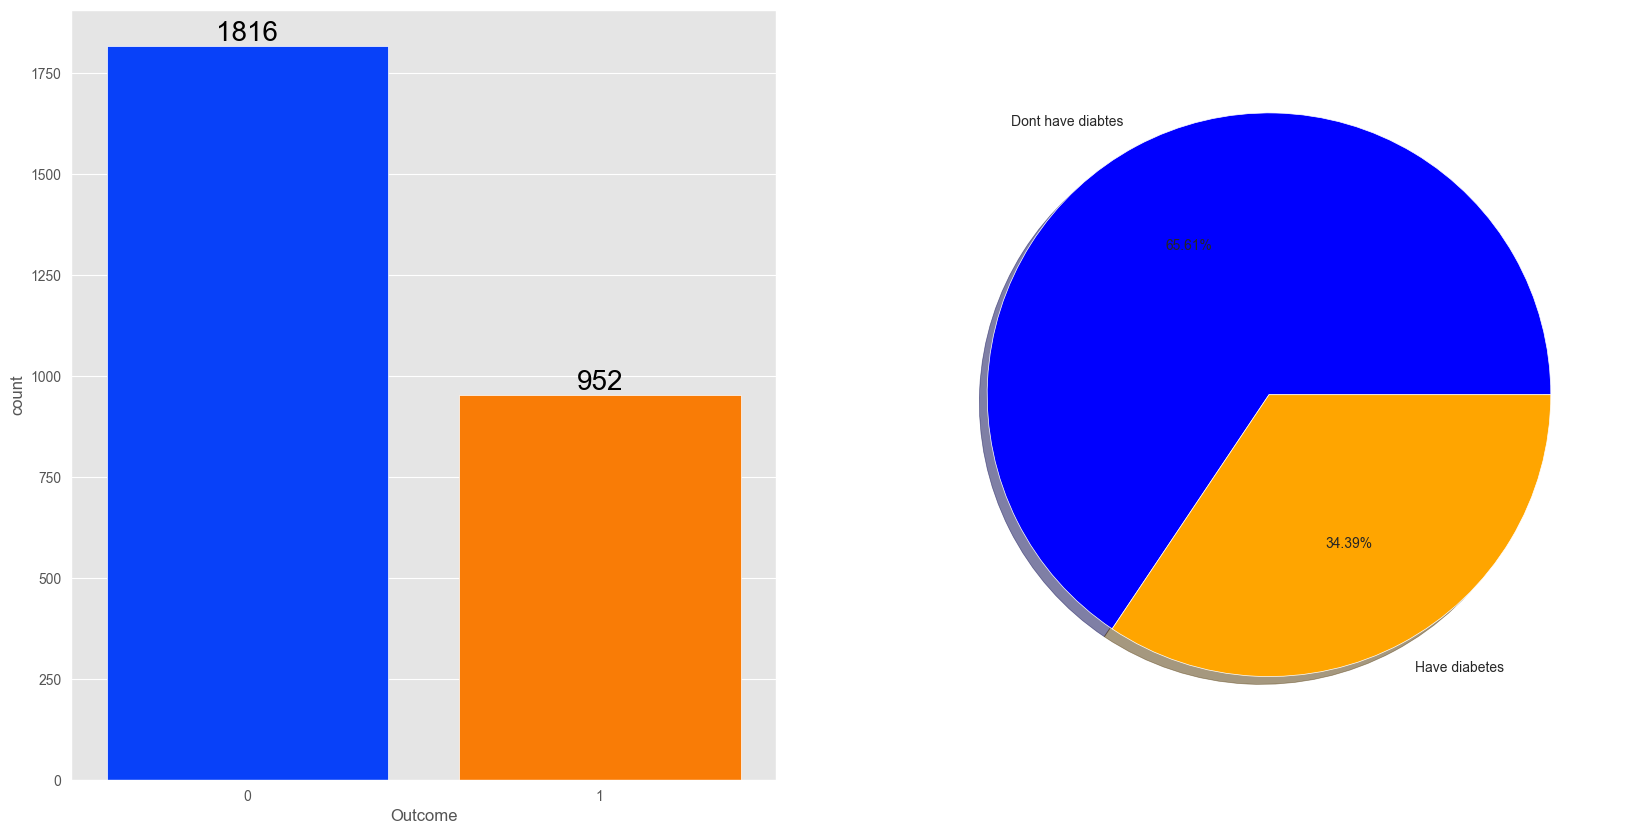

In [19]:
# Bar chart for Outcome Variable
f, ax = plt.subplots(1,2, figsize=(20,10))
sns.set_style('ticks')

sns.countplot(x='Outcome', data=data, palette='bright', saturation=.95, ax=ax[0])
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=20)
    
plt.pie(x=data['Outcome'].value_counts(), labels=['Dont have diabtes', 'Have diabetes'],
        autopct='%1.2f%%',shadow=True,colors=['blue','orange'])
plt.show()

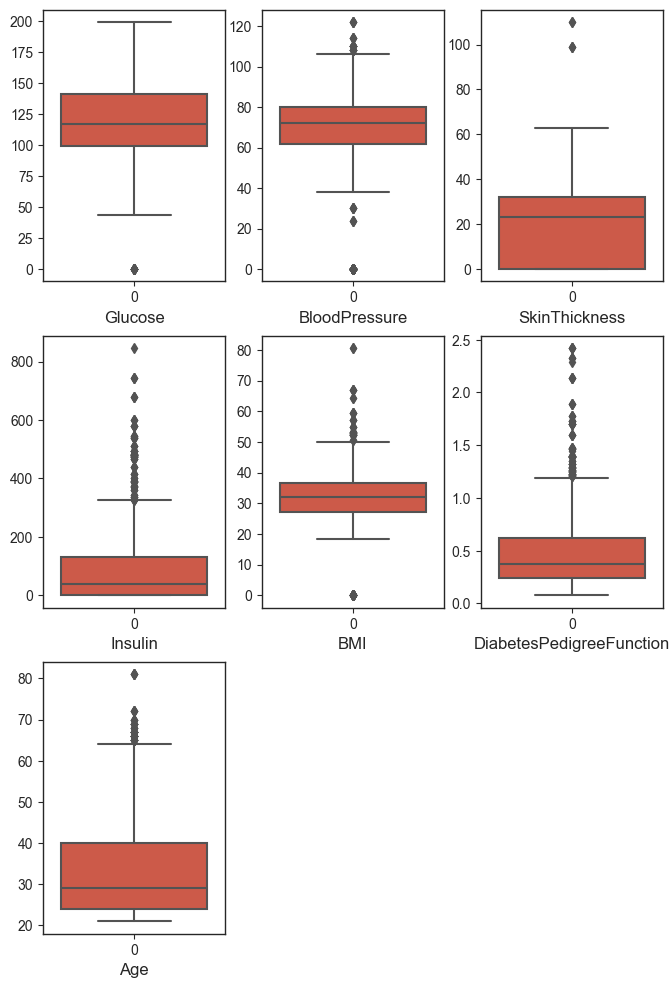

In [20]:
# Outlier Checking
r=3
c=3
i=1

fig = plt.figure(figsize = (8,12))

for feature in continuous_feature:
    plt.subplot(r,c,i)
    plt.xlabel(feature)
    sns.boxplot(data[feature])
    i = i + 1

plt.show()
    

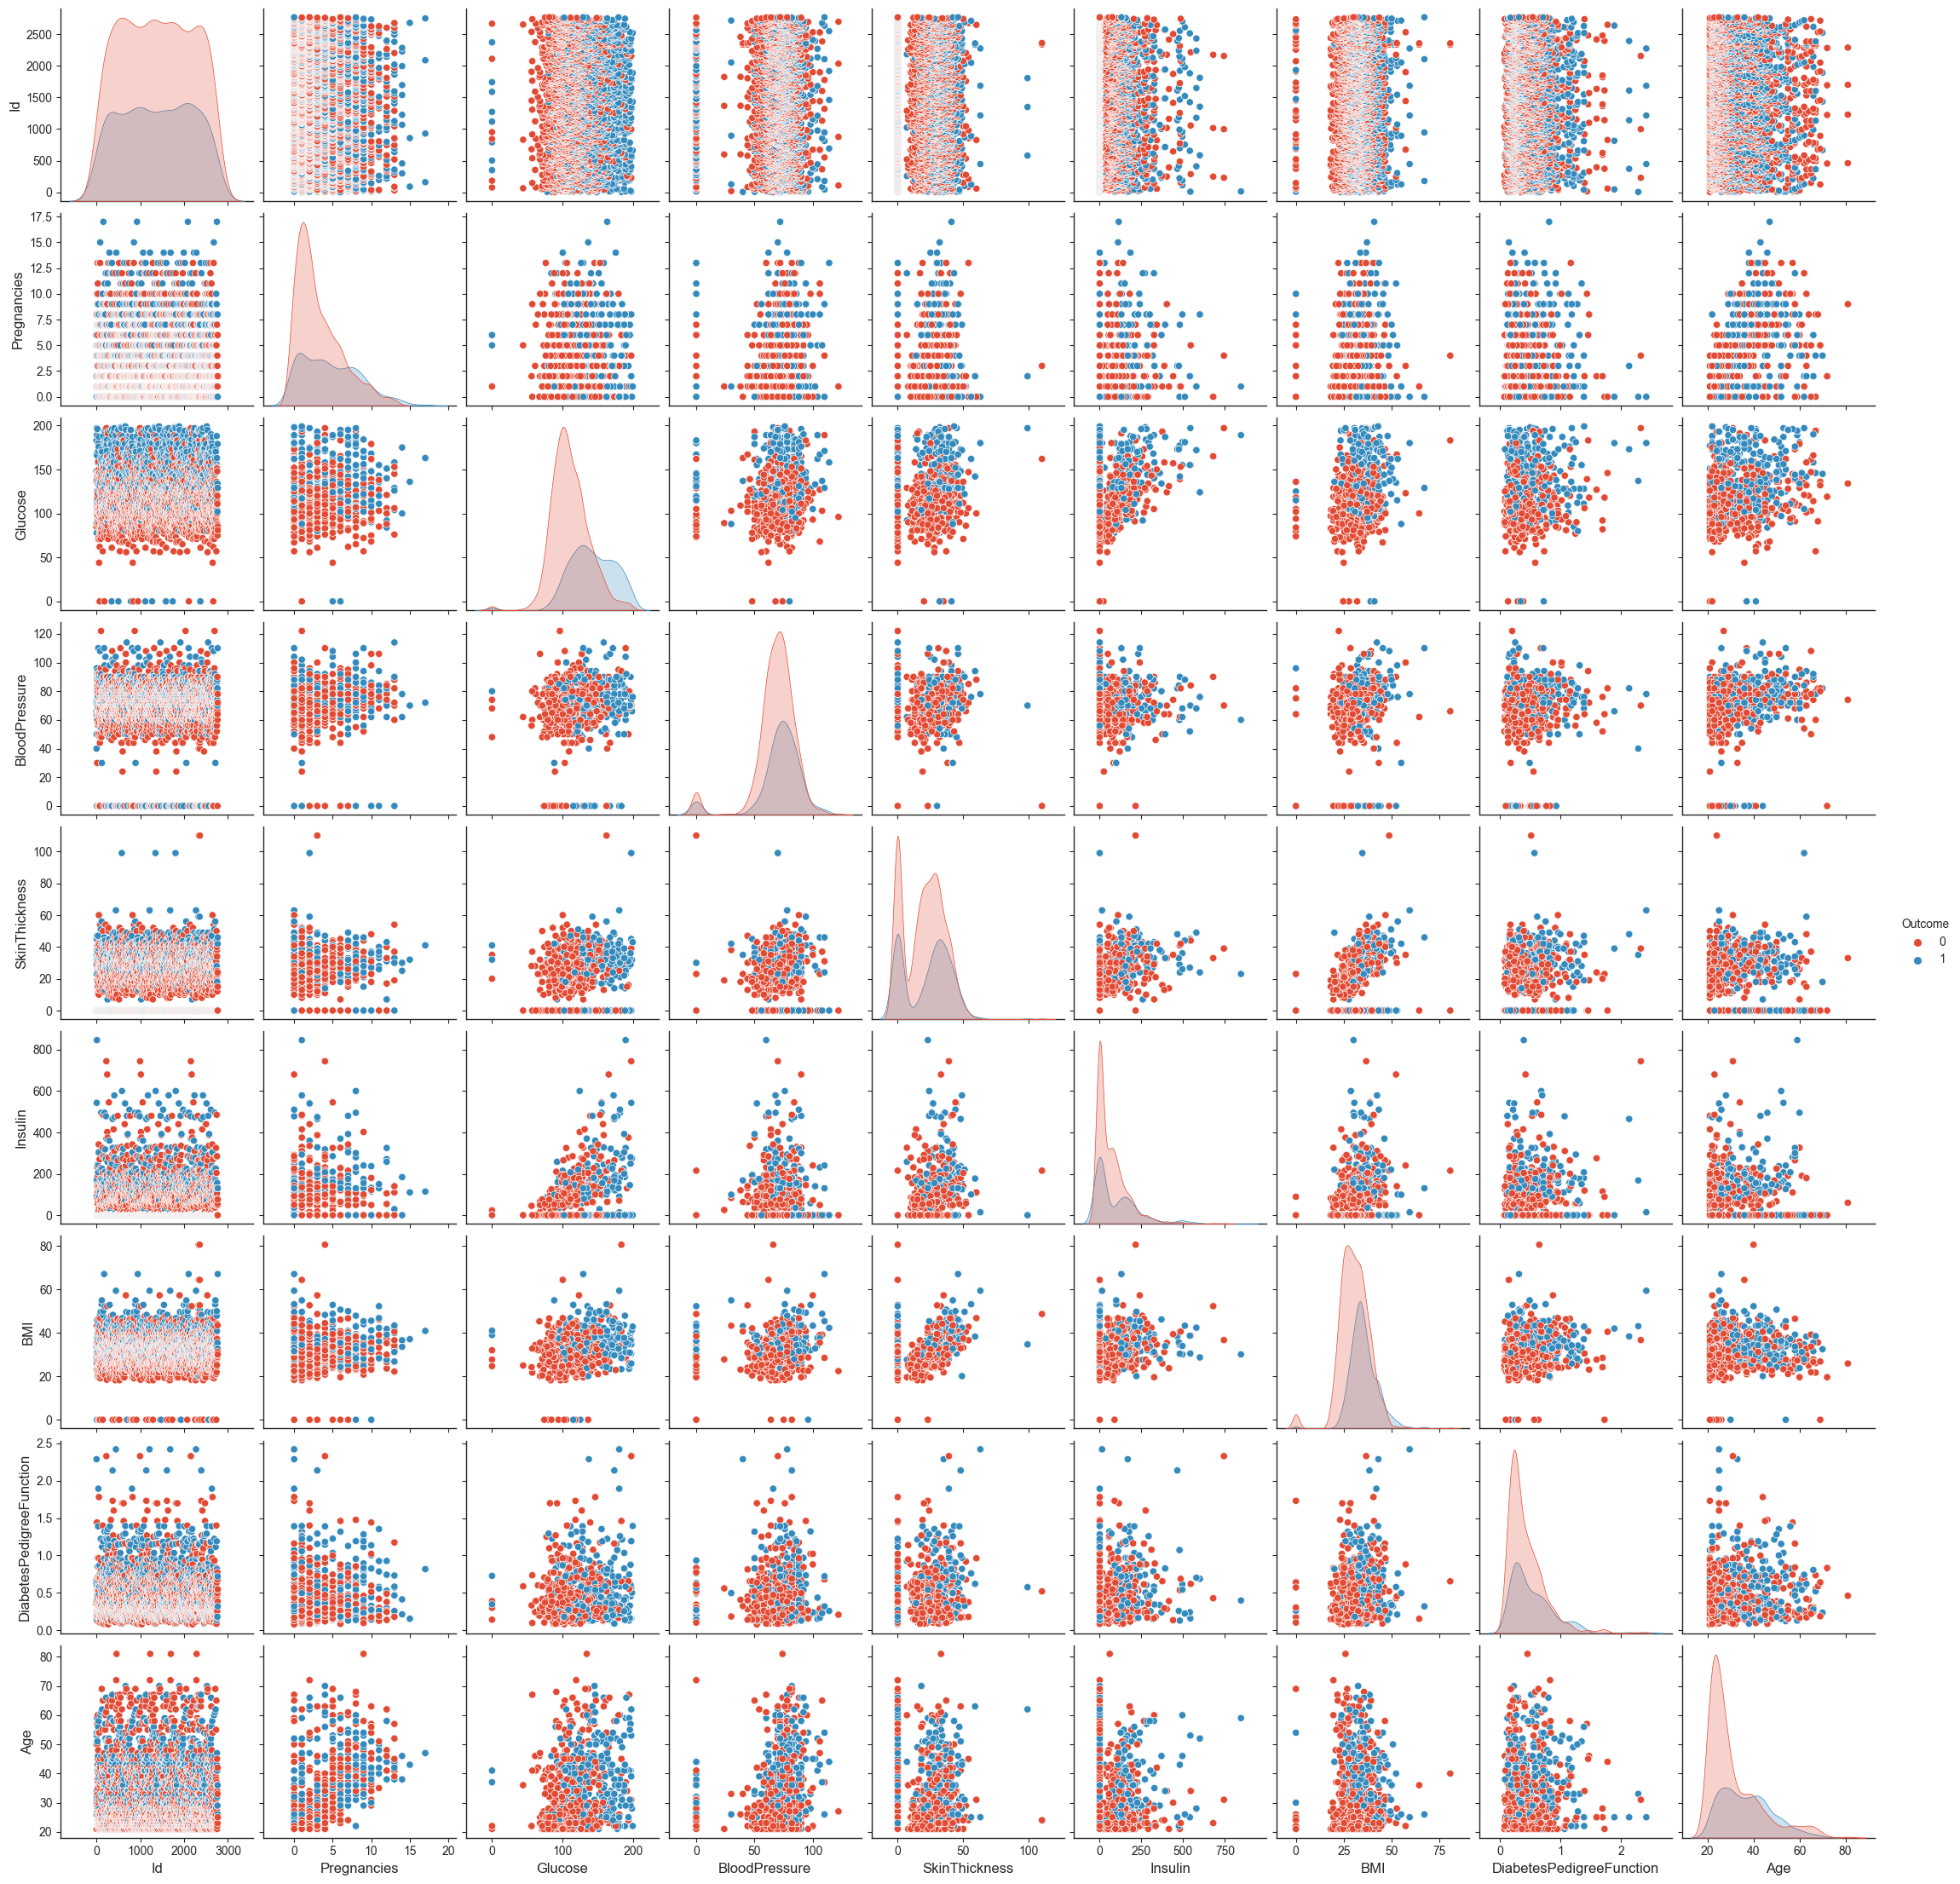

In [26]:
# Pair plot 
sns.pairplot(data, hue='Outcome')
plt.show()

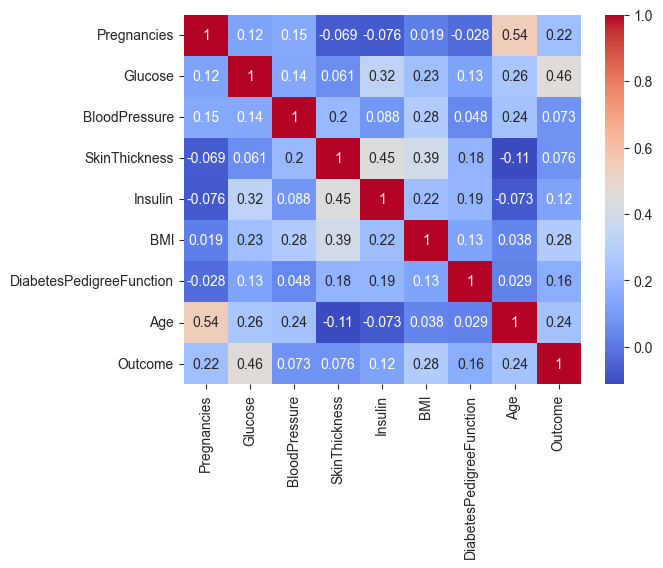

In [37]:
# heat map 
data_corr=data.drop('Id', axis=1).corr()
sns.heatmap(data_corr, cmap='coolwarm', annot=True)
plt.show()